# Assignment 2 (5 Marks)

Please indicate your name and student id clearly in the submission title and in the file. 

Name: Dharmik Patel

Student ID:  180343800

## Question 1

Please use the same data set as in Assignment 1 for the following plot. 

Visualize the time series: Regular Unleaded Gasoline price in "London" from 2000 to 2022. Smooth the time series using simple moving average with windowsize=5.

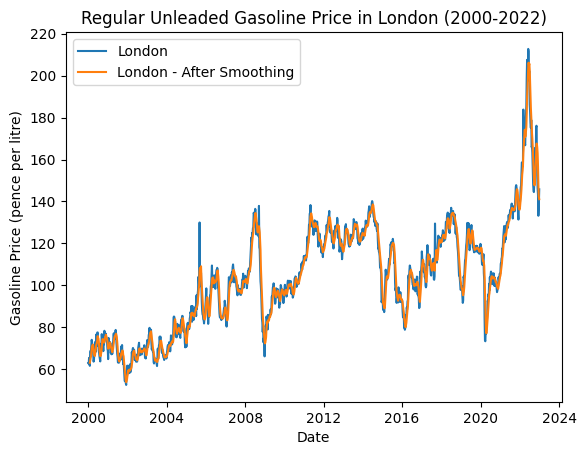

In [7]:
import pandas as pd
import geopandas as gpanda
import matplotlib.pyplot as pplt

df = pd.read_csv('data/fueltypesall1991-2023.csv')

data_cities = df[(df['Date'] >= '2000') & (df['Date'] <= '2023') & (df['Fuel Type'] == 'Regular Unleaded Gasoline')]
london = data_cities["London"]

london.index = pd.to_datetime(data_cities['Date'])
london.sort_index(inplace=True)
s_average = london.rolling(window=5).mean()

#Set Labels
pplt.plot(london.index, london, label="London")
pplt.plot(s_average.index, s_average, label="London - After Smoothing")
pplt.xlabel("Date")
pplt.ylabel("Gasoline Price (pence per litre)")
pplt.title("Regular Unleaded Gasoline Price in London (2000-2022)")
pplt.legend()
pplt.show()

## Question 2

The following data set includes the volcanos in the world. 
https://github.com/plotly/datasets/blob/master/volcano_db.csv

Please plot a map with three countries: Canada, US and Mexico. Show the exact locations (latitude and longitude) of the volcanos on this map.


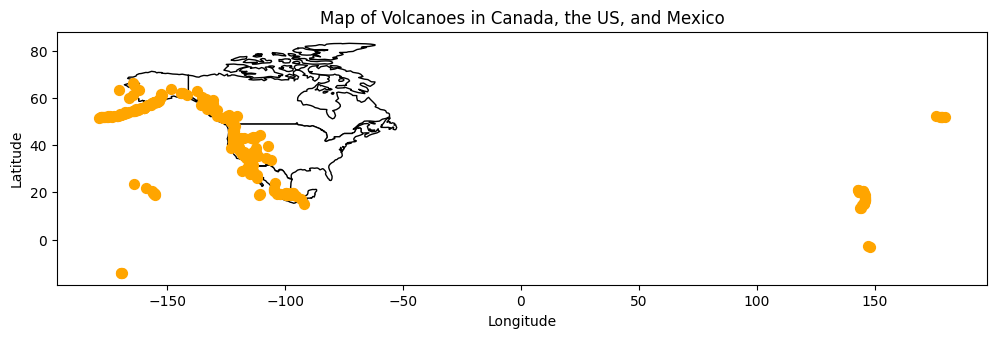

In [6]:
import pandas as pd
import geopandas as gpanda 
import matplotlib.pyplot as pplt


volcano = pd.read_csv('data/volcano_db.csv', encoding = "ISO-8859-1")
world = gpanda.read_file(gpanda.datasets.get_path('naturalearth_lowres'))

canada = world.loc[lambda df: df['name'] == 'Canada']
us = world.loc[lambda df: df['name'] == 'United States of America']
mexico = world.loc[lambda df: df['name'] == 'Mexico']

volcano = volcano.loc[volcano['Country'].isin(['Canada', 'United States', 'Mexico'])]

volcano = gpanda.GeoDataFrame(volcano, geometry=gpanda.points_from_xy(volcano.Longitude, volcano.Latitude))

fig, ax = pplt.subplots(figsize=(12,8))
canada.plot(ax=ax, color='white', edgecolor='black')
us.plot(ax=ax, color='white', edgecolor='black')
mexico.plot(ax=ax, color='white', edgecolor='black')
volcano.plot(ax=ax, color='orange', markersize=50)

#Set Labels
ax.set_title('Map of Volcanoes in Canada, the US, and Mexico')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
pplt.show()